### Linear Regression (aka ordinary least squares)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import pandas as pd
import numpy as np

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [23]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


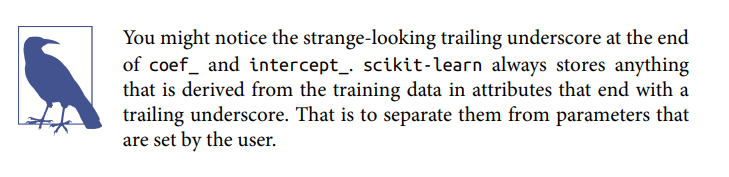

In [24]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


<h5>
An R^2 of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not over‐
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more pow‐
erful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regres‐
sion model as before:

</h5>

In [25]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

<h5>When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R^2
 on the test set is much worse:
</h5>

In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


<h5>This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression, which we will look into next.</h5>

## Ridge regression
<h5>
Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.7
</h5>

<h5>Ridge regression is implemented in linear_model.Ridge. Let’s see how well it does
on the extended Boston Housing dataset</h5>

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


<h5>As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. This is consistent with our expectation. With linear
regression, we were overfitting our data. Ridge is a more restricted model, so we are
less likely to overfit. A less complex model means worse performance on the training
set, but better generalization. As we are only interested in generalization perfor‐
mance, we should choose the Ridge model over the LinearRegression model.</h5>

<h5>The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. For example:
</h5>

In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


<h5>
Decreasing alpha allows the coefficients to be less restricted, meaning we move right
in Figure 2-1. For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:
</h5>

In [38]:
ridge01 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.70


<h5>Here, alpha=0.1 seems to be working well. We could try decreasing alpha even more
to improve generalization. For now, notice how the parameter alpha corresponds to
the model complexity as shown in Figure 2-1. We will discuss methods to properly
select parameters in Chapter 5.
</h5>

<h5>We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the coef_ attribute of models with different values of alpha. A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha. This
is confirmed in the plot in Figure 2-12:
</h5>

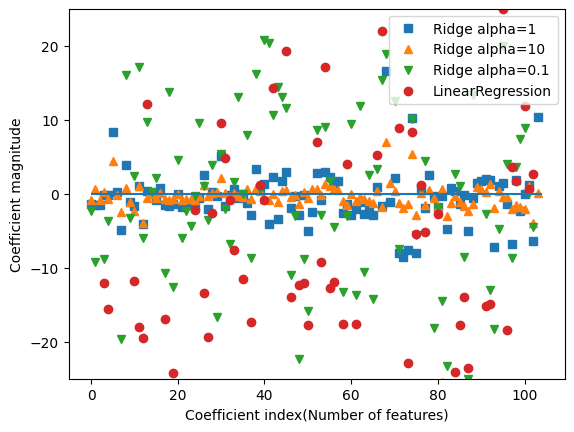

In [55]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index(Number of features)")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


<h5>Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100. The y-axis shows the numeric values of the corresponding values of the
coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0) are so large they are outside of the chart.
</h5>

<h5>Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available. For Figure 2-13, we subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called learning curves):
</h5>

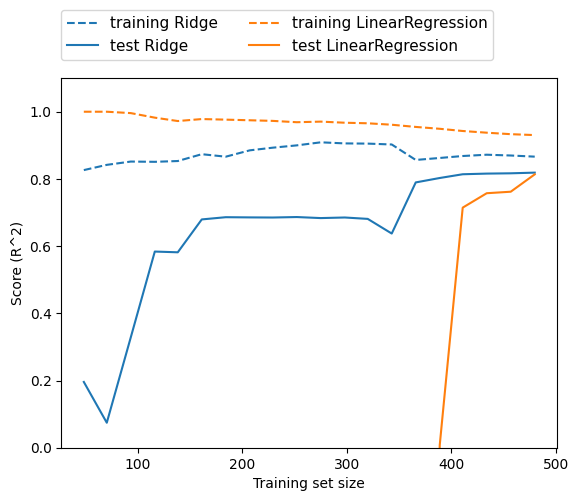

In [48]:
mglearn.plots.plot_ridge_n_samples()

<h5>As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance). Another interesting aspect of
Figure 2-13 is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.
</h5>

### Lasso

<h5>An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restrict coefficients to be close to zero, but in a slightly different way, using Lr regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are <i>exactly zero</i>. This means some features are entire ignored by the model. This can be seen as a form of automatic feature selection. having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

Let's apply the lasso to the extended Boston Housing dataset:
</h5>

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso().fit(X_train, y_train)
print("Training set sco: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set sco: 0.29
Test set score:0.21
Number of features used: 4


<h5>As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run):</h5>

In [51]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


<h5>A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to understand.
<br>
If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:
</h5>

In [52]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


<h5>Again, we can plot the coefficients of the different models, similarly to Figure 2-12.
The result is shown in Figure 2-14:
</h5>

Text(0, 0.5, 'Coefficient magnitude')

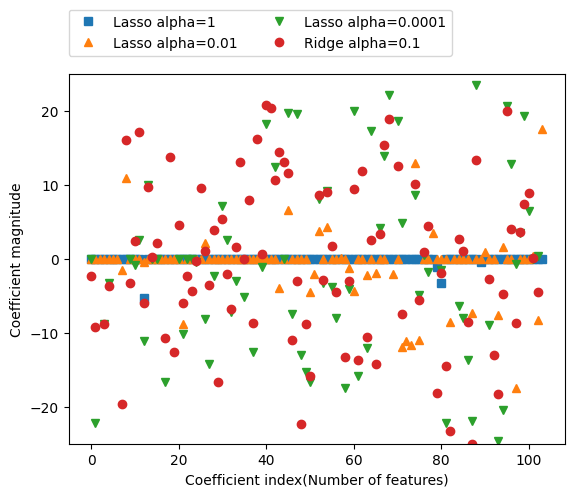

In [54]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index(Number of features)")
plt.ylabel("Coefficient magnitude")


<h5>Figure 2-14. Comparing coefficient magnitudes for lasso regression with different values
of alpha and ridge regression<br 10cm>


For alpha=1, we not only see that most of the coefficients are zero (which we already
knew), but that the remaining coefficients are also small in magnitude. Decreasing
alpha to 0.01, we obtain the solution shown as the green dots, which causes most
features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregu‐
larized, with most coefficients nonzero and of large magnitude. For comparison, the
best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar
predictive performance as the lasso model with alpha=0.01, but using Ridge, all coef‐
ficients are nonzero.<br></br>
In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.
</h5>